In [1]:
import h5py
import psana
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import  rotate
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit,minimize
import multiprocessing
import os
from functools import partial
import time
import sys
import argparse
from datetime import datetime
import tempfile
import XSpect.XSpect_Analysis
import XSpect.XSpect_Controller
import XSpect.XSpect_Visualization
import XSpect.XSpect_PostProcessing
import XSpect.XSpect_Diagnostics



**2D Scan**

Time binning: 0.05113636363636331 ps steps


/sdf/home/l/lbgee/working_xspect/XSpecT/XSpect/XSpect_Visualization.py:144: RuntimeWarning: invalid value encountered in divide
  laser_on_spectrum=xas_analysis.summed_laser_on/xas_analysis.summed_norm_on


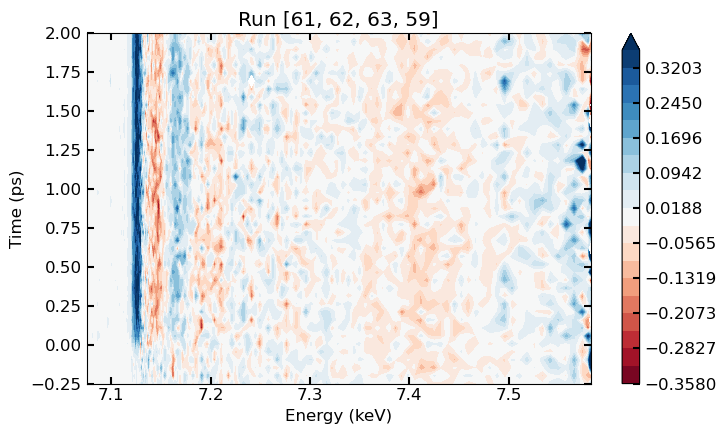

In [2]:
start=time.time()
xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=22, hutch='xcs', experiment_id='xcsx1008722')
xas=XSpect.XSpect_Controller.XASBatchAnalysis()
keys=['event_time','ipm5/xpos','epics/ccm_E','epicsUser/ccm_E_setpoint','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm4/sum','ipm4/sum','tt/AMPL','epix_2/ROI_0_sum'] #'epix10k2M/azav_azav'
names=['rtime','ipm5_xpos','ccm','ccm_E_setpoint','time_tool_correction','lxt_ttc'  ,'encoder','ipm','ipm5', 'time_tool_ampl','epix']
xas.set_key_aliases(keys,names)
xas.add_filter('simultaneous','time_tool_ampl',0.001)
xas.add_filter('xray','ipm',500.0)
xas.add_filter('simultaneous','ipm',500.0)

xas.scattering=True
xas.run_parser(['61 62 63 59']) # 7.5 uJ -0.5 to 2 ps
xas.mintime = -0.25
xas.maxtime = 2
xas.numpoints = 45
# xas.primary_analysis_parallel_loop(4,xas_experiment)
xas.primary_analysis_loop(xas_experiment)
end=time.time()
print('Time binning: {} ps steps'.format(np.min(np.diff(xas.time_bins))))

v=XSpect.XSpect_Visualization.XASVisualization()
v.combine_spectra(xas_analysis=xas, 
                  xas_laser_key='epix_simultaneous_laser_time_energy_binned',
                  xas_key='epix_xray_not_laser_time_energy_binned',
                  norm_laser_key='ipm_simultaneous_laser_time_energy_binned',
                  norm_key='ipm_xray_not_laser_time_energy_binned',interpolate=True)

v.plot_2d_difference_spectrum(xas)
plt.gca().set_title(f'Run {xas.runs}',)
#plt.xlim(7.105,7.125)
#plt.axvline(7.1245, color = 'r')
plt.tight_layout()